In [1]:
from sympy import *
init_printing()
from IPython.display import display

%matplotlib inline

import matplotlib.pyplot as plt

# Equation for Neuron Paper

      A dendritic segment can robustly classify a pattern by subsampling a small number of cells from a larger population.  Assuming a random distribution of patterns, the exact probability of a false match is given by the following equation:


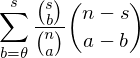

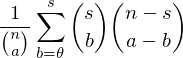

In [2]:
oxp = Symbol("Omega_x'")
b = Symbol("b")
n = Symbol("n")
theta = Symbol("theta")
s = Symbol("s")
a = Symbol("a")

subsampledOmega = (binomial(s, b) * binomial(n - s, a - b)) / binomial(n, a)
subsampledFpF = Sum(subsampledOmega, (b, theta, s))
subsampledOmegaSlow = (binomial(s, b) * binomial(n - s, a - b)) 
subsampledFpFSlow = Sum(subsampledOmegaSlow, (b, theta, s))/ binomial(n, a)

display(subsampledFpF)
display(subsampledFpFSlow)

where n refers to the size of the population of cells, a is the number of active cells at any instance in time, s is the number of actual synapses on a dendritic segment, and θ is the threshold for NMDA spikes. Following   (Ahmad & Hawkins, 2015), the numerator counts the number of possible ways θ or more cells can match a fixed set of s synapses. The denominator counts the number of ways a cells out of n can be active. 
    
## Example usage

In [52]:
display("n=10000, a=64, s=24, omega=12", subsampledFpF.subs(s,583).subs(n, 20000).subs(a, 300).subs(theta, 20).evalf())

'n=10000, a=64, s=24, omega=12'

In [32]:
display("n=10000, a=300, s=24, omega=12", subsampledFpFSlow.subs(theta, 18).subs(s, 150).subs(n, 20000).subs(a, 200).evalf())

KeyboardInterrupt: 

In [22]:
display("n=2048, a=400, s=40, theta=20", subsampledFpF.subs(theta, 15).subs(s, 30).subs(n, 10000).subs(a, 300).evalf())

'n=2048, a=400, s=40, theta=20'

## Table 1B

In [6]:
T1B = subsampledFpFSlow.subs(n, 100000).subs(a, 2000).subs(theta,s).evalf()
print "n=100000, a=2000, theta=s"
display("s=6",T1B.subs(s,6).evalf())
display("s=8",T1B.subs(s,8).evalf())
display("s=10",T1B.subs(s,10).evalf())

n=100000, a=2000, theta=s


's=6'

's=8'

's=10'

## Table 1C

In [7]:
T1C = subsampledFpFSlow.subs(n, 100000).subs(a, 2000).subs(s,2*theta).evalf()
print "n=100000, a=2000, s=2*theta"
display("theta=6",T1C.subs(theta,6).evalf())
display("theta=8",T1C.subs(theta,8).evalf())
display("theta=10",T1C.subs(theta,10).evalf())
display("theta=12",T1C.subs(theta,12).evalf())

n=100000, a=2000, s=2*theta


'theta=6'

'theta=8'

'theta=10'

'theta=12'

## Table 1D

In [8]:
m = Symbol("m")
T1D = subsampledFpF.subs(n, 100000).subs(a, 2000).subs(s,2*m*theta).evalf()
print "n=100000, a=2000, s=2*m*theta"
display("theta=10, m=2",T1D.subs(theta,10).subs(m,2).evalf())
display("theta=10, m=4",T1D.subs(theta,10).subs(m,4).evalf())
display("theta=10, m=6",T1D.subs(theta,10).subs(m,6).evalf())
display("theta=20, m=6",T1D.subs(theta,20).subs(m,6).evalf())

n=100000, a=2000, s=2*m*theta


'theta=10, m=2'

'theta=10, m=4'

'theta=10, m=6'

'theta=20, m=6'

# Charts for SDR Paper

      The following sections calculates the numbers for some of the SDR paper charts.
      

## Importance of large n


In [9]:
eq1 = subsampledFpFSlow.subs(s, 24).subs(theta, 12)
print "a=128 cells active, s=16 synapses on segment, dendritic threshold is theta=8\n"
errorList = []
nList = []
for n0 in range(300,20100,200):
    error = eq1.subs(n, n0).subs(a,n0/2).evalf()
    errorList += [error]
    nList += [n0]
    print "population n = %5d, sparsity = %5.2f%%, probability of false match = "%(n0, 100.0*32.0/n0), error
    
print errorList
print nList

a=128 cells active, s=16 synapses on segment, dendritic threshold is theta=8

population n =   300, sparsity = 10.67%, probability of false match =  0.584014929308308
population n =   500, sparsity =  6.40%, probability of false match =  0.582594747080399
population n =   700, sparsity =  4.57%, probability of false match =  0.582007206016863
population n =   900, sparsity =  3.56%, probability of false match =  0.581686021979051
population n =  1100, sparsity =  2.91%, probability of false match =  0.581483533877904
population n =  1300, sparsity =  2.46%, probability of false match =  0.581344204898149
population n =  1500, sparsity =  2.13%, probability of false match =  0.581242471033283
population n =  1700, sparsity =  1.88%, probability of false match =  0.581164924569868
population n =  1900, sparsity =  1.68%, probability of false match =  0.581103856001899
population n =  2100, sparsity =  1.52%, probability of false match =  0.581054517612207
population n =  2300, sparsity =

## Small sparsity is insufficient

In [10]:
print ("2% sparsity with n=400")
print subsampledFpFSlow.subs(s, 4).subs(a, 8).subs(theta, 2).subs(n,400).evalf()
print ("2% sparsity with n=4000")
print subsampledFpFSlow.subs(s, 4).subs(a, 400).subs(theta, 2).subs(n,4000).evalf()


2% sparsity with n=400
0.00206314616966578
2% sparsity with n=4000
0.0522148720308419


## A small subsample can be very reliable (but not too small)

In [11]:
eq2 = subsampledFpFSlow.subs(n, 4000).subs(a, 200)
print "a=200 cells active out of population of n=4000 cells\n"
errorList = []
sList = []
for s0 in range(2,31,1):
    print "synapses s = %3d, theta = s/2 = %3d, probability of false match = "%(s0,s0/2), eq2.subs(s, s0).subs(theta,s0/2).evalf() 
    errorList += [eq2.subs(s, s0).subs(theta,s0/2).evalf()]
    sList += [s0]
    
print errorList
print sList



a=200 cells active out of population of n=4000 cells

synapses s =   2, theta = s/2 =   1, probability of false match =  0.0975118779694924
synapses s =   3, theta = s/2 =   1, probability of false match =  0.142658857560813
synapses s =   4, theta = s/2 =   2, probability of false match =  0.0139611629239578
synapses s =   5, theta = s/2 =   2, probability of false match =  0.0225066554941060
synapses s =   6, theta = s/2 =   3, probability of false match =  0.00220175230959234
synapses s =   7, theta = s/2 =   3, probability of false match =  0.00371165622691847
synapses s =   8, theta = s/2 =   4, probability of false match =  0.000362364391941437
synapses s =   9, theta = s/2 =   4, probability of false match =  0.000626817494743231
synapses s =  10, theta = s/2 =   5, probability of false match =  6.10197168557792e-5
synapses s =  11, theta = s/2 =   5, probability of false match =  0.000107342341945980
synapses s =  12, theta = s/2 =   6, probability of false match =  1.041436824